In [1]:
# Library used
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [2]:
# Function to import csv data from url
def importdata(url):
    product_df = pd.read_csv(
        url)
    # Displaying dataset information
    print("Dataset Length: ", len(product_df))
    print("Dataset Shape: ", product_df.shape)
    print("Dataset: \n", product_df.head())
    return product_df

In [3]:
# Function for splitting dataset into 70% train and 30% test
def splitdataset(balance_data):
    # Separating the targe variable
    X = balance_data.iloc[:, :-1]
    Y = balance_data["CA level"].values
    
    # Checking if X and Y are string before encoding
    isXString = False
    isYString = False
    for i in X:
        if isinstance(i, str):
            isXString = True
    for i in Y:
        if isinstance(i, str):
            isYString = True
    
    # Label Encoding
    if isXString:
        le = LabelEncoder()
        X = X.apply(le.fit_transform)
    if isYString:
        le = LabelEncoder()
        Y = Y.apply(le.fit_transform)
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100
    )
    
    return X, Y, X_train, X_test, y_train, y_test

In [4]:
# Function to perform training algorithms

# Using Gini Index
def train_using_gini(X_train, X_test, y_train):
    
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100)#, max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Using Entropy
def train_using_entropy(X_train, X_test, y_train):
    # Creating the classifier object
    clf_entropy = DecisionTreeClassifier(criterion="entropy",
                                      random_state=100)#, max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [5]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:", y_pred)
    return y_pred

In [6]:
# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          metrics.accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          metrics.classification_report(y_test, y_pred))

In [7]:
# Driver code
url = "cancer.csv"
data = importdata(url)
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

Dataset Length:  310
Dataset Shape:  (310, 15)
Dataset: 
   Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  Cholesterol  Albumin  \
0   F       Y            Y       Y     Y       14.5          261     2.60   
1   F       N            Y       Y     N        1.1          302     4.14   
2   M       N            N       N     S        1.4          176     3.48   
3   F       N            Y       Y     S        1.8          244     2.54   
4   F       N            Y       Y     N        3.4          279     3.53   

   Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  Prothrombin  CA level  
0     156    1718.0  137.95            172        190         12.2         4  
1      54    7394.8  113.52             88        221         10.6         3  
2     210     516.0   96.10             55        151         12.0         4  
3      64    6121.8   60.63             92        183         10.3         4  
4     143     671.0  113.15             72        136         10.9         3  


In [8]:
# Training using gini and entropy
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)

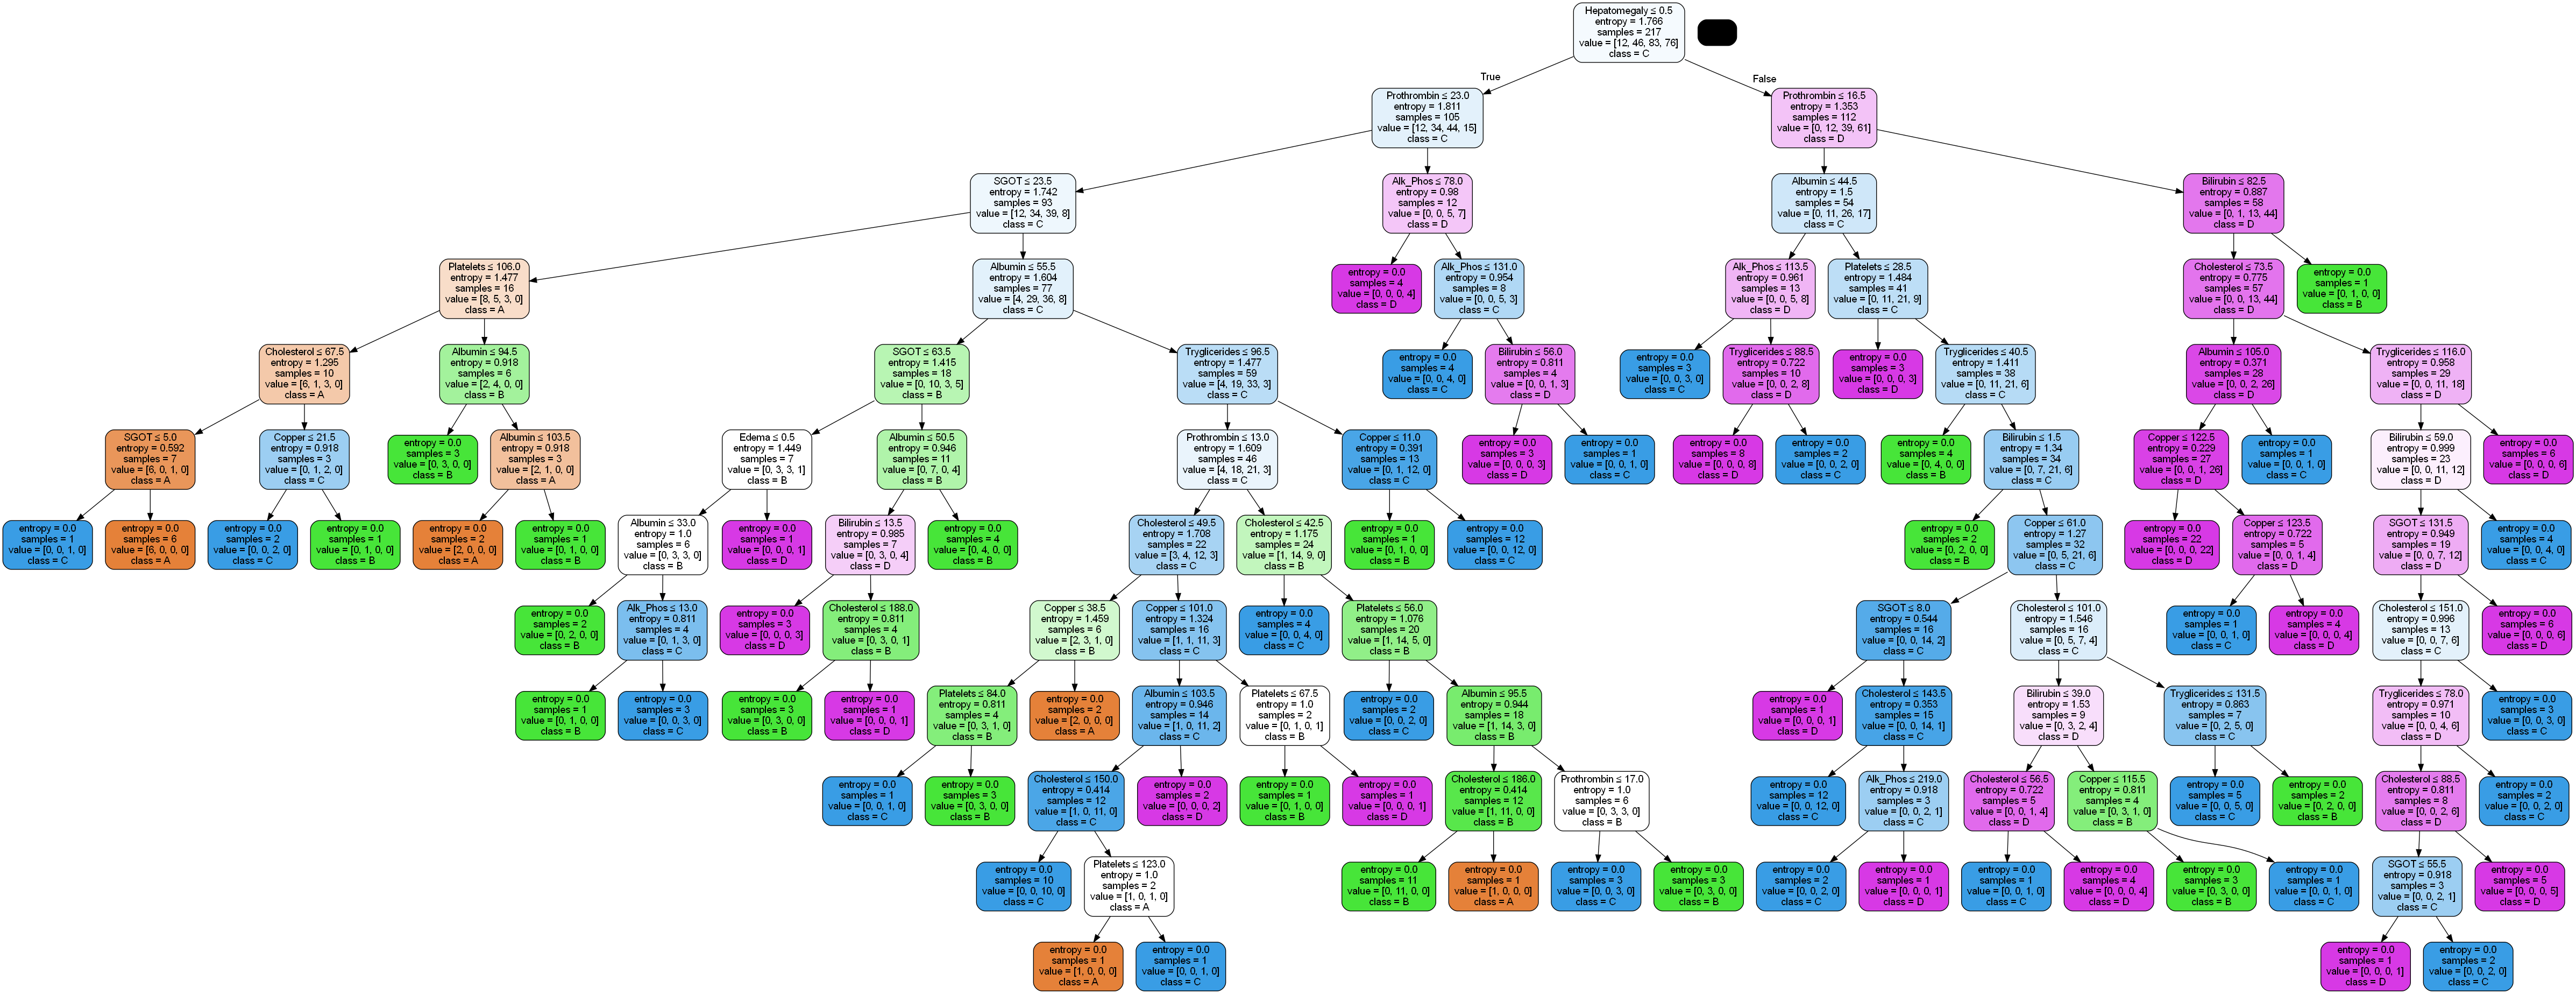

In [9]:
# Visualize decision tree

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['A','B','C','D'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('cancer_gini.png')
Image(graph.create_png())

dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['A','B','C','D'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('cancer_entropy.png')
Image(graph.create_png())

In [10]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Gini Index:
Predicted values: [4 1 4 4 4 3 3 3 3 4 4 4 2 3 3 2 4 4 3 3 4 2 4 3 3 3 3 2 4 3 4 3 3 2 3 3 3
 4 3 3 4 4 3 4 3 3 4 3 3 4 2 3 4 4 4 3 3 3 2 4 1 4 3 3 3 2 3 2 4 2 3 4 4 3
 3 4 1 3 1 4 1 4 4 3 4 4 3 3 3 2 4 4 4]
Confusion Matrix:  [[ 0  0  2  2]
 [ 2  5  7  6]
 [ 2  4 20 10]
 [ 1  2 12 18]]
Accuracy :  46.236559139784944
Report :                precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.45      0.25      0.32        20
           3       0.49      0.56      0.52        36
           4       0.50      0.55      0.52        33

    accuracy                           0.46        93
   macro avg       0.36      0.34      0.34        93
weighted avg       0.46      0.46      0.46        93

Results Using Entropy:
Predicted values: [4 2 4 4 3 4 2 4 2 4 3 4 4 4 3 4 4 4 3 3 4 2 4 2 3 4 2 2 4 3 4 3 3 2 3 3 2
 1 4 3 4 4 3 3 3 3 3 3 3 4 2 2 4 4 3 4 3 3 2 3 4 4 2 4 3 3 3 4 4 2 3 4 4 1
 1 4 2 4 2 4 2 4 4 